### Importar librerias y cargue de datos

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.tree import DecisionTreeClassifier

import pandas as pd
import numpy as np
import math as mth
import matplotlib.pyplot as plt
import scipy.stats as stats
import plotly.express as px
import seaborn as sns

In [32]:
gym = pd.read_csv('/datasets/gym_churn_us.csv', sep=',')

In [33]:
#Verificación del DF
display(gym)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


In [34]:
# Información DF
print(gym.describe(),"\n\n\n")
gym.info()

            gender  Near_Location      Partner  Promo_friends        Phone  \
count  4000.000000    4000.000000  4000.000000    4000.000000  4000.000000   
mean      0.510250       0.845250     0.486750       0.308500     0.903500   
std       0.499957       0.361711     0.499887       0.461932     0.295313   
min       0.000000       0.000000     0.000000       0.000000     0.000000   
25%       0.000000       1.000000     0.000000       0.000000     1.000000   
50%       1.000000       1.000000     0.000000       0.000000     1.000000   
75%       1.000000       1.000000     1.000000       1.000000     1.000000   
max       1.000000       1.000000     1.000000       1.000000     1.000000   

       Contract_period  Group_visits          Age  \
count      4000.000000   4000.000000  4000.000000   
mean          4.681250      0.412250    29.184250   
std           4.549706      0.492301     3.258367   
min           1.000000      0.000000    18.000000   
25%           1.000000      0.00

In [35]:
#Revisión de datos nulos
gym.isnull().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

In [36]:
#Revisión de datos duplicados
gym.duplicated().sum()

0

In [37]:
#Renombrar nombres de las variables (Se ajusta las letras mayúcuslas a minúsculas)
gym = gym.rename(columns=str.lower)
gym.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

### EDA (Análisis Exploratorio de Datos)

#### ¿Contiene alguna característica ausente?

In [38]:
gym.describe(include='all')

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


#### Conclusiones y comentarios:
* Todas las columnas tienen 4.000 valores no nulos, no hay evidencia de datos ausentes.
* Se aprecia que las columnas son de tipo int64 y float64, lo que las hace adecuadas para el procesamiento y análisis.
* Rango de valores como 0 – 1 o intervalos específicos (ej. Contract_period) confirman su naturaleza categórica.
* Las medias permiten ver la distribución:
    - Gender = 1: aprox. 51%.
    - Near_Location = 1: aprox. 84.5%.
* Age presenta un rango entre 18 y 41 años, con una media de 29.18, lo cual sugiere una distribución razonable.
* Avg_additional_charges_total tiene una desviación estándar de 96.35, con valores desde casi 0 hasta 552.
* Avg_class_frequency_total y Avg_class_frequency_current_month tienen rangos de 0 a ~ 6 visitas semanales y desviaciones estándar similares (~ 1). → Variabilidad moderada y comportamientos de visita relativamente estables entre la frecuencia total y la actual.
* Para churn, la media de 0.26525 indica que 26.5% de los clientes abandonaron el servicio el mes siguiente.→ Tasa relevante y constituye la variable principal a predecir.


#### Valores medios de las características en dos grupos: Clientes que permanecen y los que desisten

In [39]:
gym.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


#### Comentarios y conclusiones

* La proporción de clientes que viven cerca es 10.5 puntos mayor entre quienes permanecen (near_location).
* La retención es 18 puntos más alta en clientes corporativos (partner).
* Una diferencia de 17 puntos, indicando mayor compromiso en clientes referidos por amigos (promo_friends).
* Quienes se quedan tienen contratos ~4 meses más largos, una brecha muy marcada (contract_period).
* Quienes no desertan tienen 0.20 visitas grupales más por semana en promedio (group_visit).
* Los desertores son ~3 años más jóvenes en promedio (age).
* Los clientes que permanecen gastan 43.4 unidades monetarias más (avg_additional_charges_total).
* Una diferencia de 3.7 meses, lo que indica que la deserción ocurre mayormente al inicio (lifetime).
* Quienes desertan visitan el gimnasio entre 0.5 y 1 clase menos por semana (avg_class_frequency_total & avg_class_frequency_current_month).

#### Histograma de barras y distribución para clientes que permanecen y los que desisten

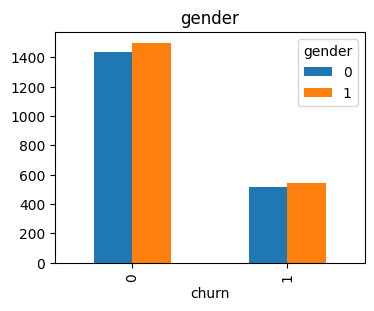

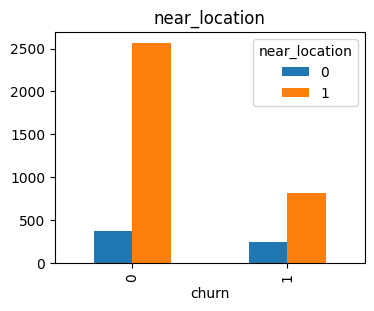

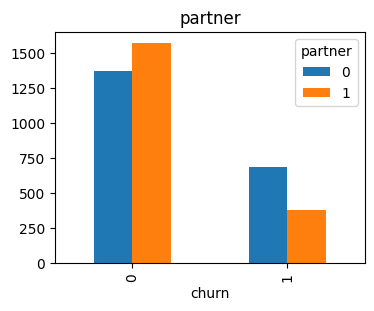

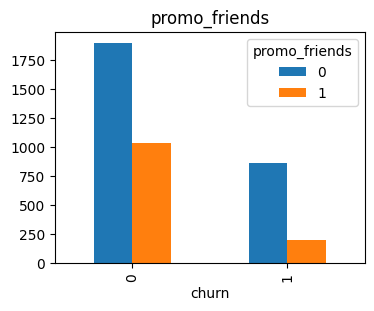

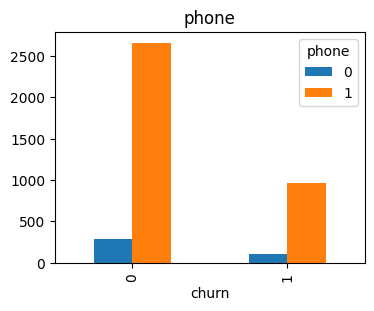

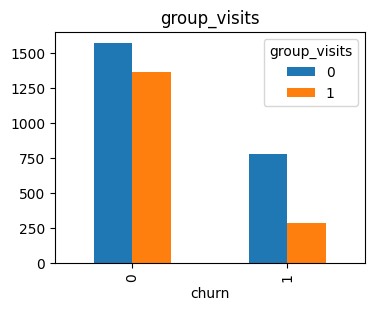

<Figure size 300x200 with 0 Axes>

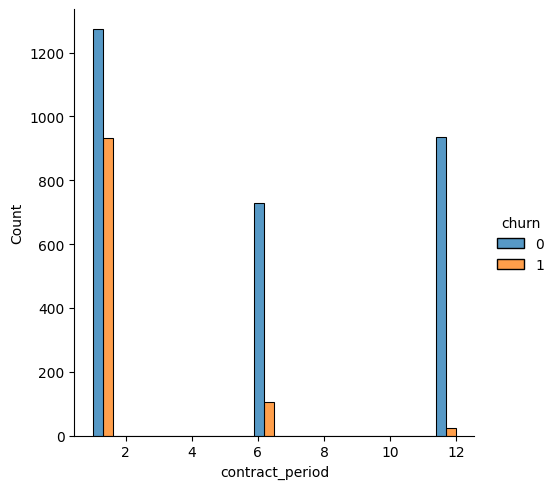

<Figure size 300x200 with 0 Axes>

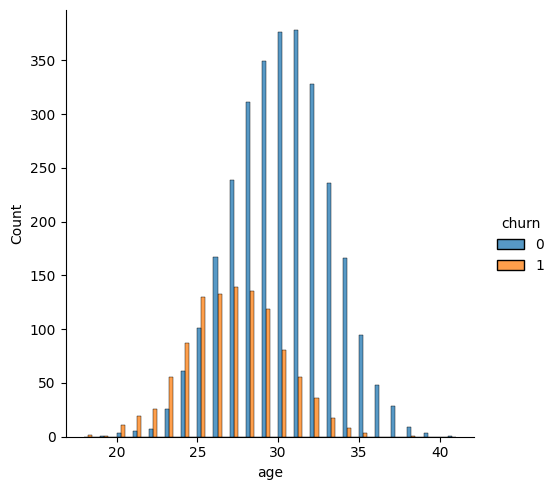

<Figure size 300x200 with 0 Axes>

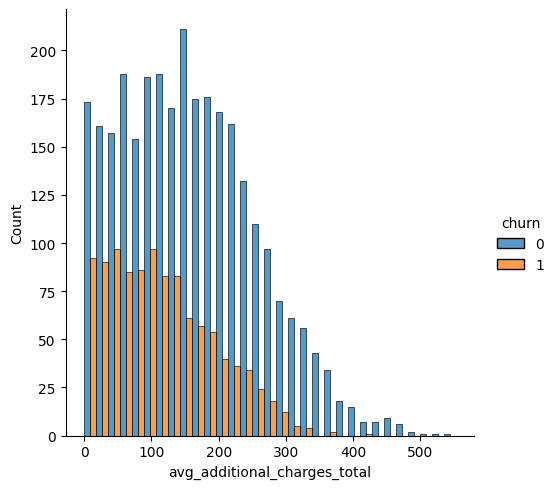

<Figure size 300x200 with 0 Axes>

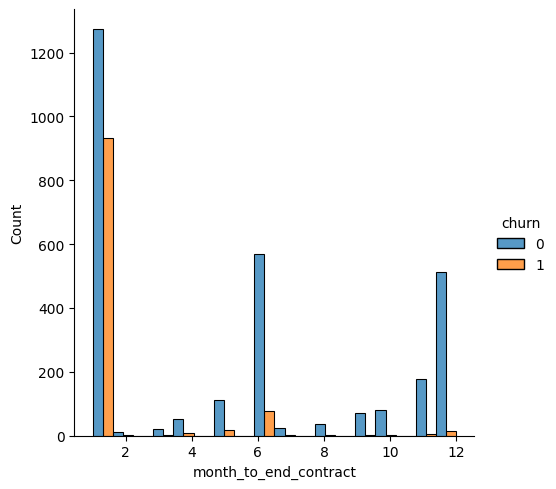

<Figure size 300x200 with 0 Axes>

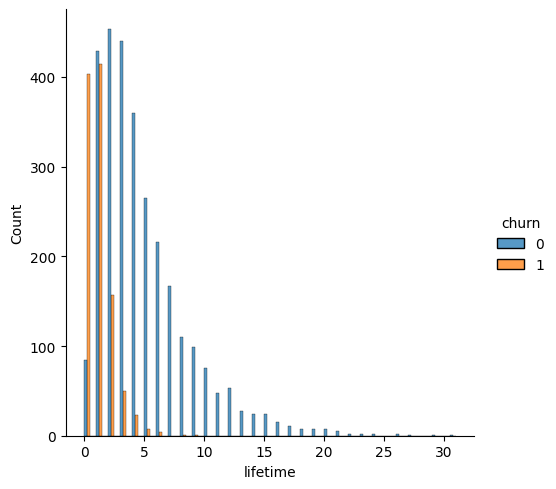

<Figure size 300x200 with 0 Axes>

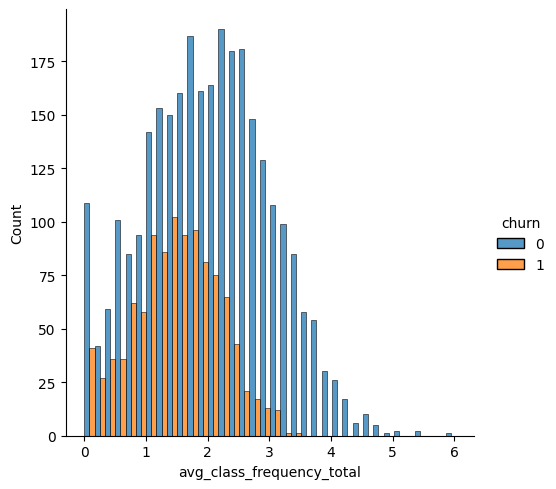

<Figure size 300x200 with 0 Axes>

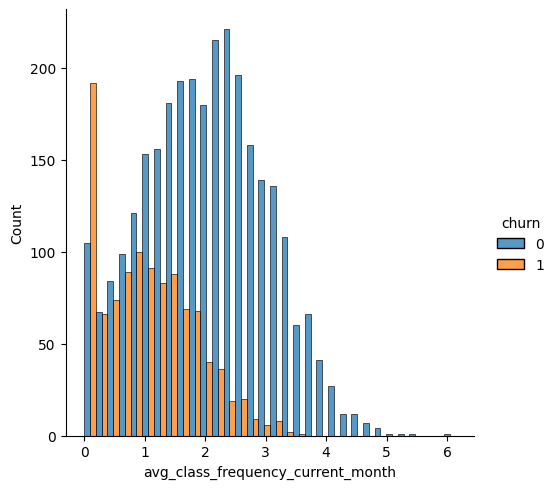

In [51]:
numeric_cols = ['contract_period', 'age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month'] 
binary_categorical_cols = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits','contract_period', 'age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month'] 

for i in binary_categorical_cols:
    if i in numeric_cols:
        plt.figure(figsize=(3,2))
        sns.displot(gym, x=i, hue="churn", multiple="dodge")
        plt.show()
    else:
        gym.reset_index().pivot_table(index='churn', values='index', columns=i, aggfunc='count').plot.bar(figsize=(4, 3))
        plt.title(str(i))
        plt.show()


#### Conclusiones y comentarios
1. Hay diferencias claras entre los clientes que se quedan y los que abandonan
    *  Menor duración de contrato (contract_period)
    *  Menor tiempo restante de contrato (month_to_end_contract)
    *  Menor antigüedad (lifetime)
    *  Menor frecuencia total y mensual de clases
    *  Menores gastos adicionales (avg_additional_charges_total)
    *  Menor edad
2. En las variables binarias también se observan proporciones distintas
   * Los gráficos de barras muestran que los clientes que no hacen churn presentan proporciones más altas en:
        - near location → Significa que los desertores, viven más lejos.
        - partner → Significa que los desertores, no tienen convenios.
        - promo_friends → Significa que los desertores, no vienen por recomendación.
        - group_visit → Significa que los desertores, no asisten en grupo.
3. La variable churn está asociada de manera sistemática con hábitos, cercanía y uso del servicio → Significa que el churn no es estocástico.

#### Matriz de correlación

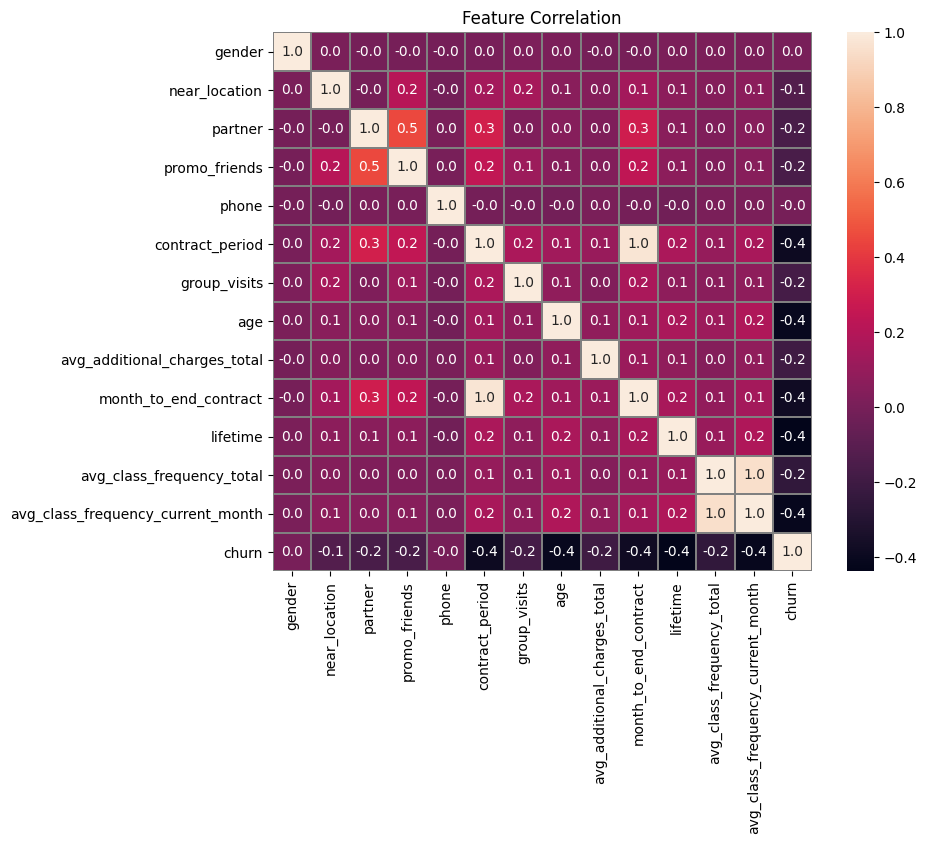

In [14]:
mat_cor = gym.corr()
plt.figure(figsize=(9, 7))
plt.title('Feature Correlation')

sns.heatmap(mat_cor, 
            annot=True, 
            square=True, 
            fmt='.1f',
            linewidths=1, 
            linecolor='gray')
plt.show()

#### Conclusiones y comentarios
El heatmap revela que el churn está principalmente asociado a factores de compromiso y uso del gimnasio: 
* Duración del contrato.
* Antigüedad.
* Frecuencia de visitas.
* Compras adicionales.

Las variables sociales también influyen, aunque en menor medida. Además, no hay multicolinealidad significativa, lo que permite entrenar modelos con estabilidad y buena capacidad predictiva.

### Modelo para predecir la cancelación (churn) de usuarios

#### Dividir los datos en conjuntos de entrenamiento y validación utilizando la función train_test_split()

In [40]:
X = gym.drop('churn', axis=1) 
y = gym['churn'] 

categorical_cols = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits', 'contract_period']

X = pd.get_dummies(X, columns=categorical_cols)

print("Dimensiones de X después de One-Hot Encoding:", X.shape)
print("Primeras 5 filas de X después de One-Hot Encoding:\n", X.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=54321)

print("\nDimensiones de los conjuntos de entrenamiento y prueba:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


Dimensiones de X después de One-Hot Encoding: (4000, 21)
Primeras 5 filas de X después de One-Hot Encoding:
    age  avg_additional_charges_total  month_to_end_contract  lifetime  \
0   29                     14.227470                    5.0         3   
1   31                    113.202938                   12.0         7   
2   28                    129.448479                    1.0         2   
3   33                     62.669863                   12.0         2   
4   26                    198.362265                    1.0         3   

   avg_class_frequency_total  avg_class_frequency_current_month  gender_0  \
0                   0.020398                           0.000000         0   
1                   1.922936                           1.910244         1   
2                   1.859098                           1.736502         1   
3                   3.205633                           3.357215         1   
4                   1.113884                           1.120078    

#### Conclusiones y comentarios
En primera instancia, se separó la variable objetivo, se transformaron las variables categóricas en formato numérico mediante _One-Hot Encoding_ y se dividió el conjunto en entrenamiento y prueba con una proporción adecuada.

Como resultado, se obtiene una matriz de características lista para ser usada en modelos supervisados de clasificación, sin riesgo de fuga de información y con una estructura reproducible.

#### Entrenamiento del modelo con dos métodos: Regresión logística & Random Forest.

##### Modelo: Regresión logística

In [41]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_lr = LogisticRegression(random_state=54321, solver='liblinear') 
model_lr.fit(X_train_scaled, y_train)

y_pred_lr = model_lr.predict(X_test_scaled)

print(f"Exactitud (Accuracy) de Regresión Logística: {accuracy_score(y_test, y_pred_lr):.3f}")
print(f"Precisión (Precision) de Regresión Logística: {precision_score(y_test, y_pred_lr):.3f}")
print(f"Recall de Regresión Logística: {recall_score(y_test, y_pred_lr):.3f}")
print('F1: {:.2f}'.format(f1_score(y_test, y_pred_lr)))
print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test, y_pred_lr)))

Exactitud (Accuracy) de Regresión Logística: 0.938
Precisión (Precision) de Regresión Logística: 0.907
Recall de Regresión Logística: 0.860
F1: 0.88
ROC_AUC: 0.91


#### Conclusiones y comentarios
El modelo de regresión logística aprende de forma adecuada, los patrones desersión de los clientes. Además, basado en la precisión y exactitud, se puede conocer lo siguiente:
* El modelo muestra tener una excelente capacidad para detectar los clientes que si se van (El recall es alto).
* El modelo evitará activar acciones sobre clientes que NO se van (La presición es alta).

##### Modelo: Random Forest

In [42]:
model_rf = RandomForestClassifier(random_state=54321, n_estimators=100) 
model_rf.fit(X_train, y_train) 

y_pred_rf = model_rf.predict(X_test) 

print(f"Exactitud (Accuracy) de Bosque Aleatorio: {accuracy_score(y_test, y_pred_rf):.3f}")
print(f"Precisión (Precision) de Bosque Aleatorio: {precision_score(y_test, y_pred_rf):.3f}")
print(f"Recall de Bosque Aleatorio: {recall_score(y_test, y_pred_rf):.3f}")
print('F1: {:.2f}'.format(f1_score(y_test, y_pred_rf)))
print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test, y_pred_rf)))

Exactitud (Accuracy) de Bosque Aleatorio: 0.912
Precisión (Precision) de Bosque Aleatorio: 0.859
Recall de Bosque Aleatorio: 0.809
F1: 0.83
ROC_AUC: 0.88


#### Conclusiones y comentarios
El modelo muestra un desempeño sólido para poder predecir la deserción con una buena exactitud y capacidad de identificar la mayoría de los clientes que podrían llegar a abandonar el gimnasio.

#### ¿Qué modelo dio mejores resultados?

Basado en los resultados anteriores, la regresión logística resulta ser la opción más óptima para este problema de deserción. Esto se debe a:
1. Tiene métricas con mayor desempeño, impacto y relevancia → Permite clasificar mejor, logra detecta más casos reales de deserción y reduce los falsos positivos y falsos negativos.
2. Para este caso, este modelo logra ser más estable y permite generalizar mejor → Desempeño más alto y balanceado.
3. Modelo con una mayor interpretabilidad → Permite analizar que variables aumentan la probabilidad de deserción, su magnitud y como se mueve la probabilidad ante posibles cambios en los factores.

Para este escenario, llevar a cabo un modelo simple y explicable, permite ofrecer mejores resultados que uno más complejo (Como lo puede llegar a ser el Random Forest).

### Clustering de usarios

In [43]:
#### Estandización de los datos

In [44]:
gym_norm = gym.drop('churn', axis = 1)
gym_norm.head(2)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244


In [45]:
# standardize the data
sc = StandardScaler()
x_sc = sc.fit_transform(gym_norm)

#### Creación de matriz de distancias basada en la matriz de características estandarizadas (Función _linkage( )_)

In [46]:
# standardize the data
sc = StandardScaler()
x_sc = sc.fit_transform(gym_norm)

In [47]:
linked = linkage(x_sc, method = 'ward')

#### Trazar el dendograma

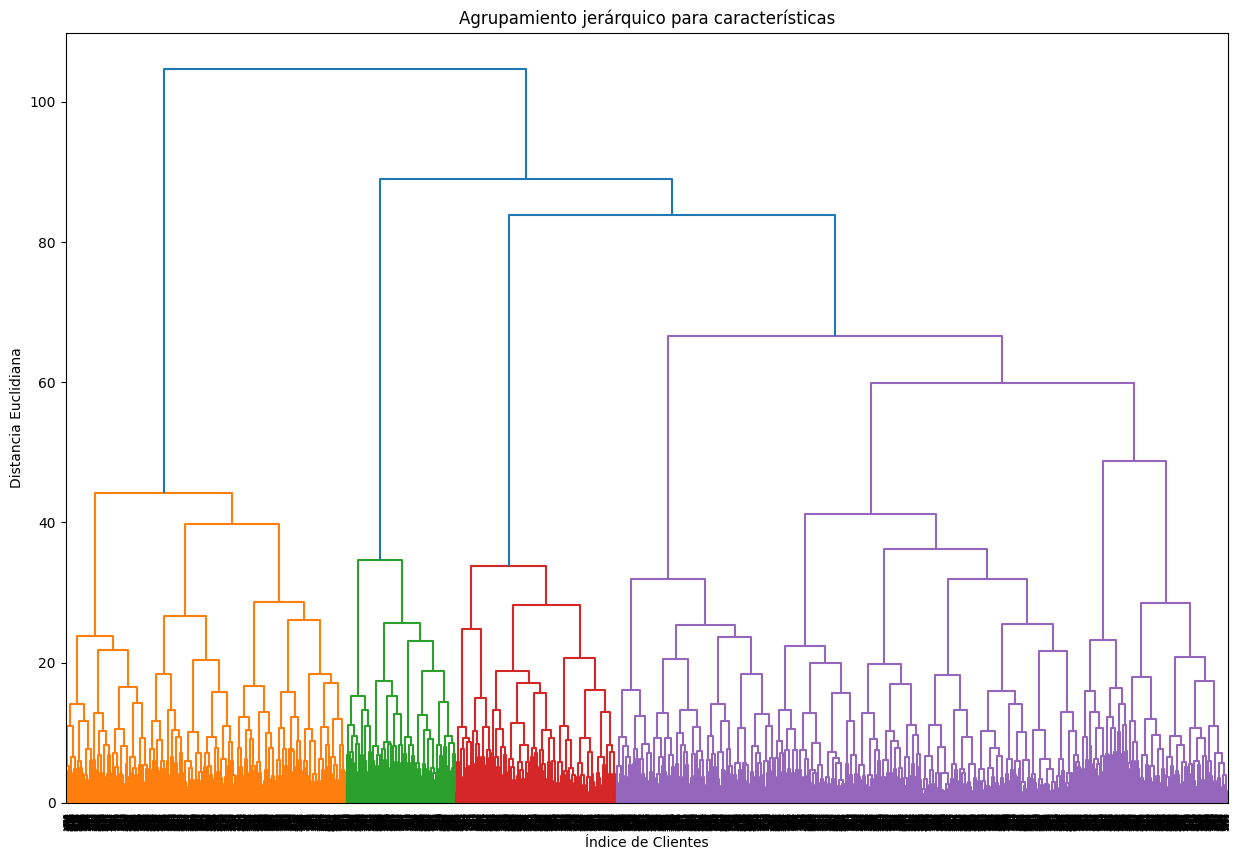

In [108]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Agrupamiento jerárquico para características')
plt.xlabel('Índice de Clientes')
plt.ylabel('Distancia Euclidiana')
plt.show() 

#### Conclusiones y comentarios

Como se puede observar, el dendrograma revela que los clientes se agrupan de forma natural en 4 segmentos, presentando clara separación entre grupos y alta similitud dentro de cada cluster, lo que lo convierte en una base sólida para segmentar clientes y analizar comportamientos como la deserción.

#### Entrenar el modelo de agrupamiento con el algoritmo K-means y predecir los clústeres de clientes.

In [48]:
k_m = KMeans(n_clusters = 5, random_state=0) 
labels = k_m.fit_predict(x_sc) 

gym_norm['cluster_km'] = labels

In [49]:
gym_norm.groupby(['cluster_km']).mean().reset_index()

,cluster_km,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
0,0,0.502970,0.959406,0.783168,0.574257,1.000000,10.889109,0.542574,29.982178,160.761016,9.954455,4.736634,1.982055,1.974789
1,1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369
2,2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324
3,3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983
4,4,0.559666,0.976134,0.356802,0.230310,0.998807,2.669451,0.473747,30.125298,161.657905,2.459427,4.898568,2.852002,2.850161


#### Conclusiones y comentarios

Las variables que mejor distinguen a los diferentes grupos son:
* Partner
* Promo Friends
* Contract Period
* Lifetime
* Month to End

Lo que refuerza la importancia de:
1. Tipo de afiliación.
2. Forma de recomendación
3. Duración del contrato en la segmentación de clientes.

De manera interesante, la asistencia a grupos no parece ser un factor determinante para diferenciar los clusters.

#### Gráficos de las distribuciones de características de los clústeres

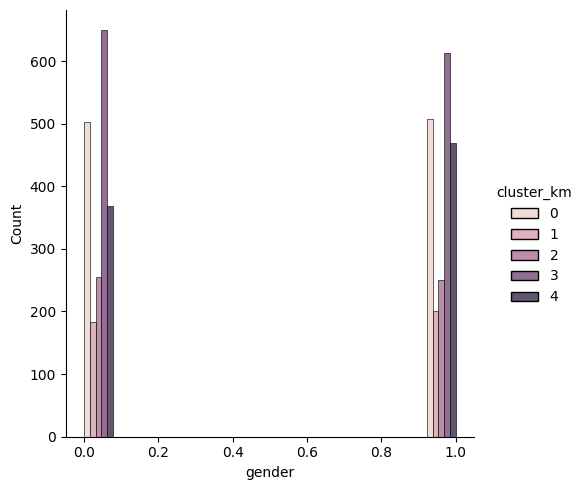

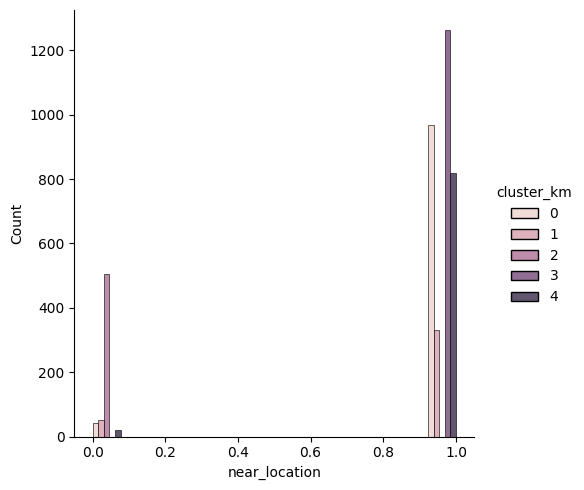

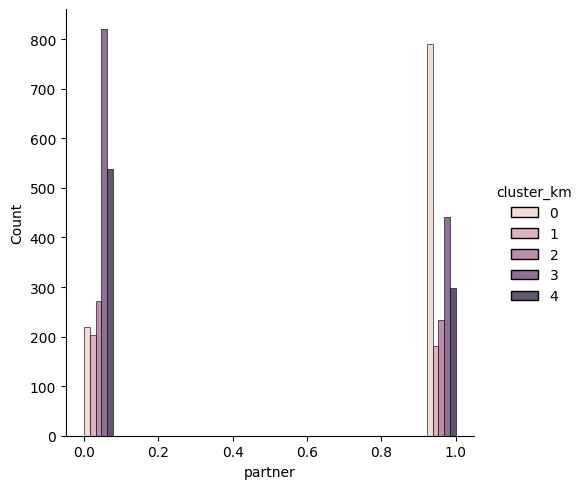

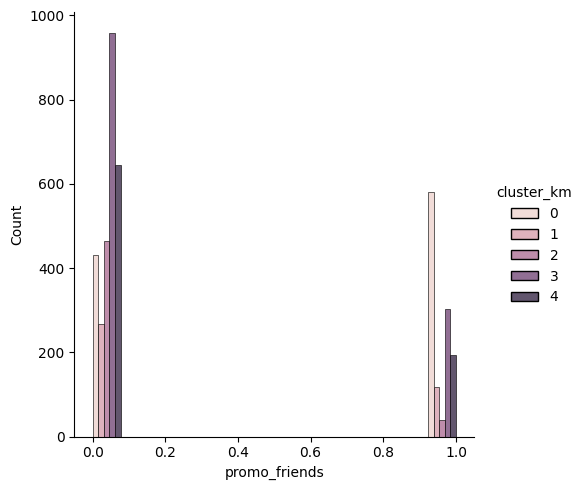

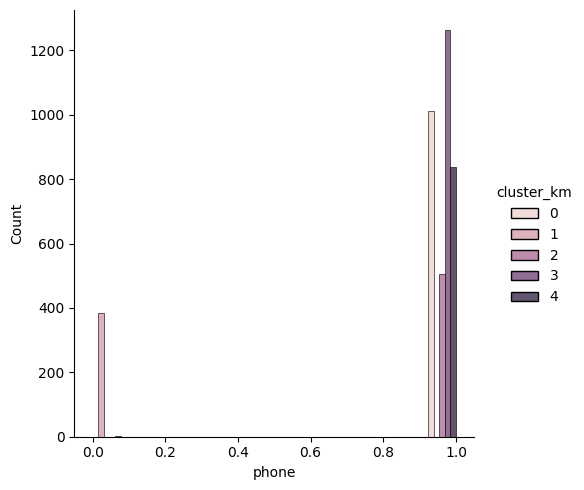

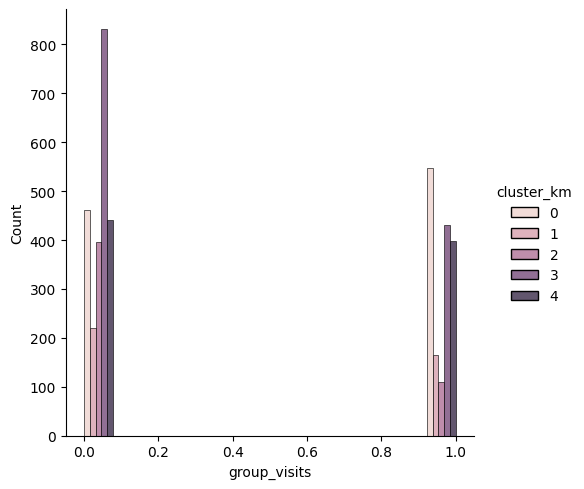

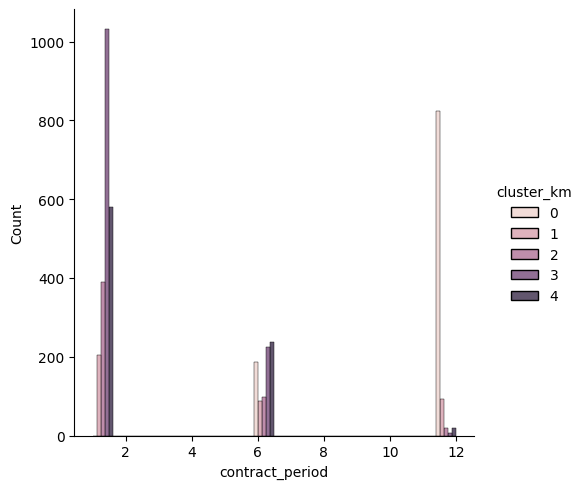

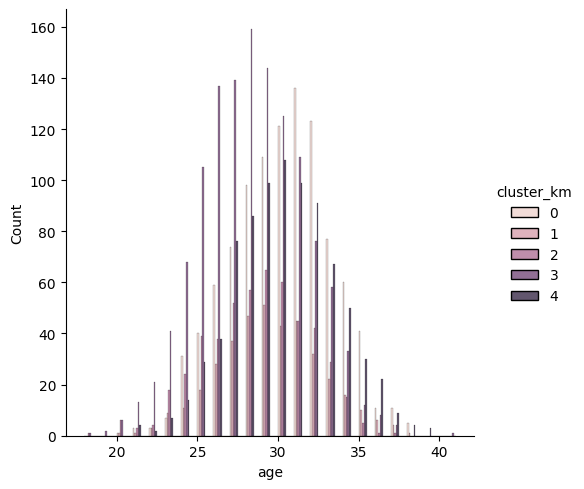

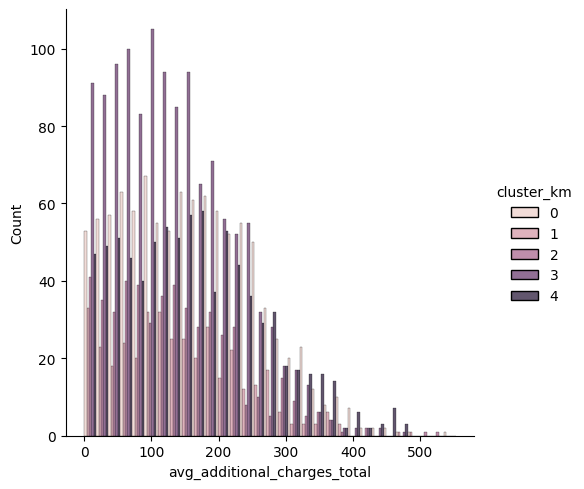

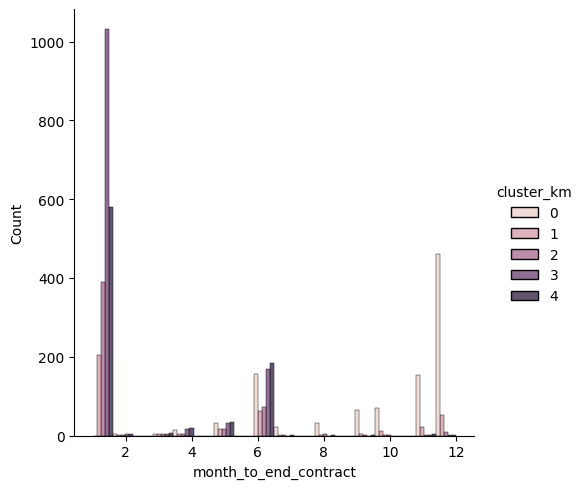

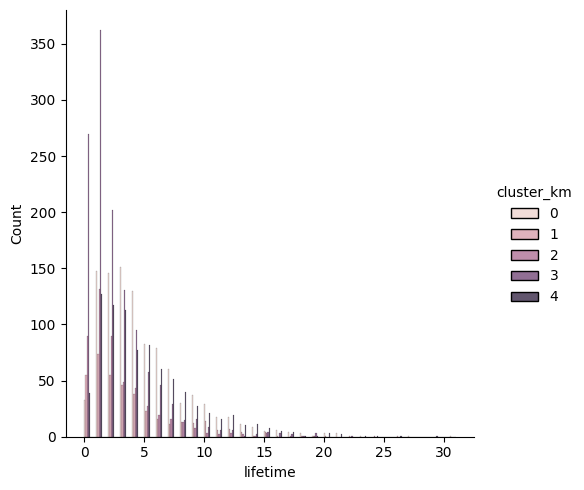

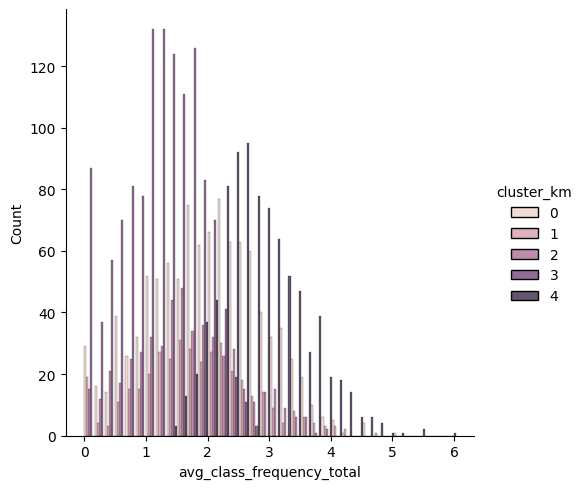

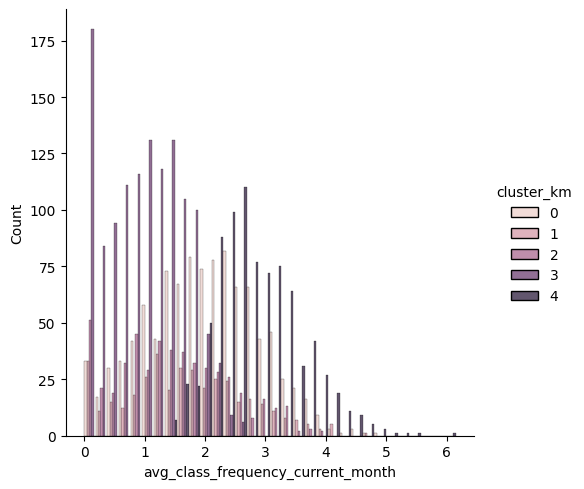

In [55]:
list_all = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits','contract_period', 'age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month'] 

for column in list_all:
    sns.displot(gym_norm, x=column, hue='cluster_km',multiple="dodge")
    plt.show()

#### Conclusiones y comentarios
* El cluster 1 se caracteriza por clientes que no ingresan por programas de convenios ni por recomendación de amigos, mientras que en el cluster 3 ocurre lo contrario. 
* El cluster 0 destaca por clientes que no proporcionan número de teléfono. 
* El cluster 4 está definido por contratos de 12 meses, mientras que el cluster 1 se compone principalmente de contratos de 1 mes.
* La edad se distribuye de manera relativamente uniforme entre los clusters, aunque el cluster 0 tiende a ser más joven. Los cargos adicionales no muestran diferencias relevantes entre grupos. En cuanto al tiempo restante de contrato, es más corto en el cluster 1 y más largo en el cluster 4.
* Finalmente, la frecuencia total y mensual de asistencia presenta distribuciones claramente diferenciadas entre los clusters, convirtiéndose en uno de los rasgos más definitorios de la segmentación.

#### Tasa de cancelación para cada cluster.

In [57]:
data_merged = pd.merge(gym_norm, gym[['age', 'avg_additional_charges_total', 'churn']],on=['age', 'avg_additional_charges_total'], how='left')
data_merged.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,cluster_km,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,1,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,3,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,3,0


In [58]:
clusters = [0,1,2,3,4]
for cluster in clusters:
    print('Churn Rate for cluster', cluster,': {:.2f}'.format((len(data_merged.query('cluster_km == @cluster & churn == 1')))
          /len(data_merged.query('cluster_km == @cluster'))))

Churn Rate for cluster 0 : 0.03
Churn Rate for cluster 1 : 0.27
Churn Rate for cluster 2 : 0.44
Churn Rate for cluster 3 : 0.51
Churn Rate for cluster 4 : 0.07


#### Conclusiones y comentarios
* Cluster 3 → Mayor probabilidad de churn (0.51): Más de la mitad se va.
* Cluster 2 → Segundo mayor churn (0.44)
* Cluster 1 → Churn moderado (0.27)
* Cluster 4 → Churn bajo (0.07)
* Cluster 0 → Menor churn (0.03)


### Conclusiones generales
En primera instancia, el análisis mostró que el churn, no es aleatorio, depende princiaplmente del nivel de compromiso del cliente, el tipo de contrato, el método de vinculación (convenios o referidos) y los hábitos de uso.

Se identificaron grupos claramente diferenciados. Algunos clusters muentran tasas muy altas de abandono, mientras que otros muestran una mayor estabilidad.

**Esto confirma una clara necesidad de crear o generar estrategias de retención o programas de renovación que tengan un enfoque segmentado y de caracter preventivo**

### Recomendaciones esenciales para interacción y retención de clientes
1. *Buscar la forma de fortalecer el compromiso desde el momento 0*: Los clientes con contratos de duración corta, antigüedad corta y baja frecuencia de uso, son los que más abandonan.

   *Solución*: Programas activos de onboarding → Correos, mensajes, asistencia guiada, notificación de clases grupales, app para favorecer el acompañamiento
2. *Incentivar contratos más largos y renovaciones tempranas*: Programas de 12 meses, presentan una baja tasa de deserción.

    *Solución*: Ofrecer descuentos para mejorar el contrato y mantener comunicación activas que creen estímulos de renovación (Ej: Correos/llamadas cuando el programa esté cerca de vencerse).
3. *Activar estrategias de recomendación y convenios*: Los clusters con mayor uso de Partner y Promo Friends muestran mejor retención.
   
   *Solución*: Creación o fortalecimiento programas corporativos, paquetes para grupos, beneficios por referidos y permitir traer acompañantes gratis cierta cantidad de veces en un mes.

4. *Enfocar la retención en los clusters de alto riesgo (3 y 2)*

   *Solución*: Contacto personalizado, invitaciones a eventos o clases, ofertas o paquetes de entrenamiento personalizado.

**EN RESUMEN:** La estrategia de retención debe tener un caracter personalizado partiendo de los resultados obtenidos en los análisis previos, esto se traduce en segmentar para atraer y mantener a los clientes. Se debe reforzar el acompañamiento en la fase inicial del contrato, promover contratos con mayor duración, buscar aprovechar los convenios y programas de referidos y priorizar acciones preventivas para lograr reducir la tasa de deserción en los clusters con mayor riesgo.